## 1. Problem Definition
>This model aims to classify the patient as having heart disease or healthy, based on patient health records

## 2. Data
* The dataset is originally taken from UCI repository [https://archive.ics.uci.edu/ml/datasets/Heart+Disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)
* The dataset can also be found at [https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

## 3. Evaluation
As this model aims at predicting crucial information related to whether a person has heart disease or not, objective is to get more than 90% accuracy

## 4. Features
The dataset has following patient attributes:
* `age`
* `sex`
* `chest pain type` (4 values)
* `resting blood pressure`
* `serum cholestoral` in mg/dl
* `fasting blood sugar` > 120 mg/dl
* `resting electrocardiographic` results (values 0,1,2)
* `maximum heart rate` achieved
* `exercise induced angina`
* `oldpeak` = ST depression induced by exercise relative to rest
* the slope of the `peak exercise ST segment`
* number of major vessels (0-3) colored by flourosopy
* `thal`: 0 = normal; 1 = fixed defect; 2 = reversable defect

### 5.1 Getting Started with standard imports

In [1]:
#base imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#import models
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#import for evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

#import for storing model
from joblib import load, dump

#### 5.2.1 Importing data


In [2]:
heart_df = pd.read_csv("./data/heart-disease.csv")
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### 5.2.2 Checking for missing values

In [3]:
heart_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### 5.2.3 Splitting into dependendent and target variables

In [4]:
x = heart_df.drop("target", axis = 1)
y = heart_df["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x, y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

### 5.3 Training models
* Using Linear Support Vector Classifier estimator

/Users/anuj-mac/Desktop/projects/mlProject1/env/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/anuj-mac/Desktop/projects/mlProject1/env/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/anuj-mac/Desktop/projects/mlProject1/env/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/anuj-mac/Desktop/projects/mlProject1/env/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/anuj-mac/Desktop/projects/mlProject1/env/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: Converg

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ......................................max_iter=1000; total time=   0.0s
[CV] END ......................................max_iter=1000; total time=   0.0s
[CV] END ......................................max_iter=1000; total time=   0.0s
[CV] END ......................................max_iter=1000; total time=   0.0s
[CV] END ......................................max_iter=1000; total time=   0.0s
[CV] END ......................................max_iter=2000; total time=   0.0s
[CV] END ......................................max_iter=2000; total time=   0.0s
[CV] END ......................................max_iter=2000; total time=   0.0s
[CV] END ......................................max_iter=2000; total time=   0.0s
[CV] END ......................................max_iter=2000; total time=   0.0s
[CV] END ......................................max_iter=3000; total time=   0.0s
[CV] END ......................................ma

/Users/anuj-mac/Desktop/projects/mlProject1/env/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/anuj-mac/Desktop/projects/mlProject1/env/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/anuj-mac/Desktop/projects/mlProject1/env/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/anuj-mac/Desktop/projects/mlProject1/env/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/anuj-mac/Desktop/projects/mlProject1/env/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of

[CV] END ......................................max_iter=3000; total time=   0.0s
[CV] END ......................................max_iter=4000; total time=   0.0s
[CV] END ......................................max_iter=4000; total time=   0.0s
[CV] END ......................................max_iter=4000; total time=   0.0s
[CV] END ......................................max_iter=4000; total time=   0.0s
[CV] END ......................................max_iter=4000; total time=   0.0s
[CV] END ......................................max_iter=5000; total time=   0.0s
[CV] END ......................................max_iter=5000; total time=   0.0s
[CV] END ......................................max_iter=5000; total time=   0.0s
[CV] END ......................................max_iter=5000; total time=   0.0s
[CV] END ......................................max_iter=5000; total time=   0.0s
Linear SVC Model accuracy = 0.62


/Users/anuj-mac/Desktop/projects/mlProject1/env/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/anuj-mac/Desktop/projects/mlProject1/env/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/anuj-mac/Desktop/projects/mlProject1/env/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/anuj-mac/Desktop/projects/mlProject1/env/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


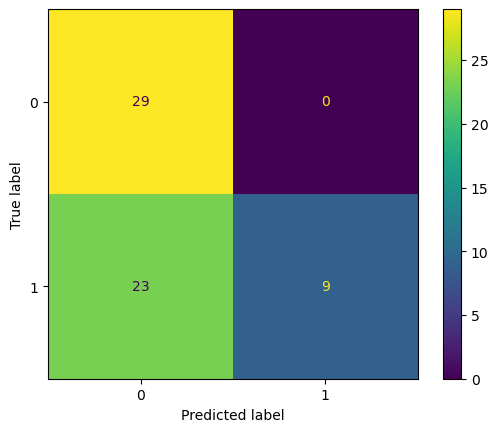

In [5]:
#Set random seed
np.random.seed(42)

#Hyper Parameters to use
hyperParameters = {
    "max_iter" : [1000, 2000, 3000, 4000, 5000]
}

#Instantiating model
linearSVCModel = LinearSVC()
rs_linearSVCModel = RandomizedSearchCV(linearSVCModel, hyperParameters, cv = 5, verbose = 2)

#Fitting data
rs_linearSVCModel.fit(x_train, y_train)

#Making predictions
y_preds1 = rs_linearSVCModel.predict(x_test)

#score of model
rs_linearSVCModel_score = rs_linearSVCModel.score(x_test, y_test)
print(f"Linear SVC Model accuracy = {rs_linearSVCModel_score:.2f}")

#confusion matrix display 
ConfusionMatrixDisplay.from_predictions(y_test, y_preds1)

* Using KNeighborsClassifier estimator

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .....................algorithm=brute, n_neighbors=7; total time=   0.0s
[CV] END .....................algorithm=brute, n_neighbors=7; total time=   0.0s
[CV] END .....................algorithm=brute, n_neighbors=7; total time=   0.0s
[CV] END .....................algorithm=brute, n_neighbors=7; total time=   0.0s
[CV] END .....................algorithm=brute, n_neighbors=7; total time=   0.0s
[CV] END .....................algorithm=brute, n_neighbors=5; total time=   0.0s
[CV] END .....................algorithm=brute, n_neighbors=5; total time=   0.0s
[CV] END .....................algorithm=brute, n_neighbors=5; total time=   0.0s
[CV] END .....................algorithm=brute, n_neighbors=5; total time=   0.0s
[CV] END .....................algorithm=brute, n_neighbors=5; total time=   0.0s
[CV] END .................algorithm=ball_tree, n_neighbors=3; total time=   0.0s
[CV] END .................algorithm=ball_tree, n

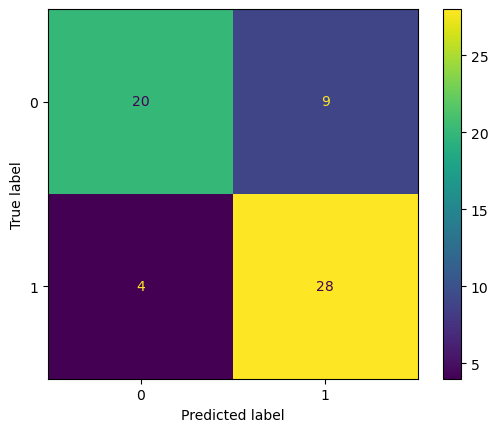

In [6]:
#Set random seed
np.random.seed(42)

#Hyper Parameters to use
hyperParameters = {
    "n_neighbors": [3, 5, 7, 9],
    "algorithm": ["ball_tree", "kd_tree", "brute"]
}

#Instantiating model
model = KNeighborsClassifier()
rs_KNeighborsModel = RandomizedSearchCV(model, hyperParameters, cv = 5, verbose = 2)

#Fitting data
rs_KNeighborsModel.fit(x_test, y_test)

#Making predictions
y_preds2 = rs_KNeighborsModel.predict(x_test)

#score of model
rs_KNeighborModel_score = rs_KNeighborsModel.score(x_test, y_test)
print(f"KNeighbor Classifier Model accuracy = {rs_KNeighborModel_score:.2f}")

#confusion matrix display 
ConfusionMatrixDisplay.from_predictions(y_test, y_preds2)

* Using RandomForestClassifier estimator

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s


/Users/anuj-mac/Desktop/projects/mlProject1/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/anuj-mac/Desktop/projects/mlProject1/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/anuj-mac/Desktop/projects/mlProject1/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behavio

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.5s
[CV] END max_depth=30, max_f

/Users/anuj-mac/Desktop/projects/mlProject1/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/anuj-mac/Desktop/projects/mlProject1/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/anuj-mac/Desktop/projects/mlProject1/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behavio

[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   0.5s
[CV] END max_depth=10, ma

/Users/anuj-mac/Desktop/projects/mlProject1/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/anuj-mac/Desktop/projects/mlProject1/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/anuj-mac/Desktop/projects/mlProject1/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behavio

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   0.5s
Random Forest Classifier Model accuracy = 0.95


/Users/anuj-mac/Desktop/projects/mlProject1/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


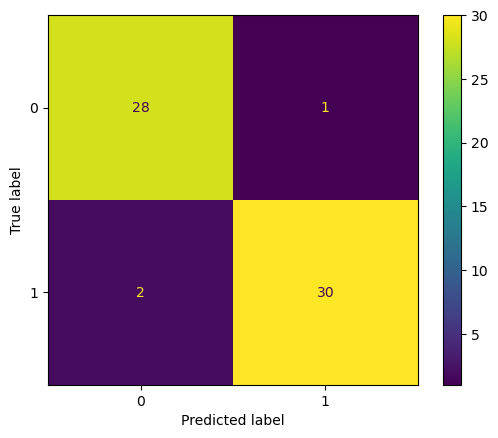

In [7]:
#Set random seed
np.random.seed(42)

#Hyper Parameters to use
hyperParameters = {
    "n_estimators": [10, 100, 200, 500, 1000, 1200],
    "max_depth": [None, 5, 10, 20, 30],
    "max_features": ["auto", "sqrt"],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4]
}

#Instantiating model
model = RandomForestClassifier()
rs_RandomForestClassifier = RandomizedSearchCV(model, hyperParameters, cv = 5, verbose = 2)

#Fitting data
rs_RandomForestClassifier.fit(x_test, y_test)

#Making predictions
y_preds3 = rs_RandomForestClassifier.predict(x_test)

#score of model
rs_RandomForestClassifierModel_score = rs_RandomForestClassifier.score(x_test, y_test)
print(f"Random Forest Classifier Model accuracy = {rs_RandomForestClassifierModel_score:.2f}")

#confusion matrix display 
ConfusionMatrixDisplay.from_predictions(y_test, y_preds3)

### 6. Comparison

In [8]:
def evaluatePrediction(y_true, y_preds):
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    return {"accuracy": round(accuracy, 2),
           "precision": round(precision, 2),
           "recall": round(recall, 2),
           "f1-score": round(f1, 2)}


<Axes: >

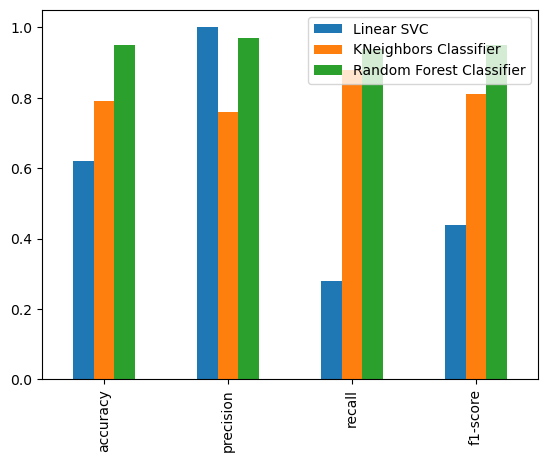

In [9]:
evaluate_metrics = pd.DataFrame({
    "Linear SVC": evaluatePrediction(y_test, y_preds1),
    "KNeighbors Classifier": evaluatePrediction(y_test, y_preds2),
    "Random Forest Classifier": evaluatePrediction(y_test, y_preds3)
})
evaluate_metrics.plot.bar()

In [11]:
#save models

#Linear SVC
dump(rs_linearSVCModel, filename = "model/LinearSVCModel.joblib")

#KNeighbors Classifier
dump(rs_KNeighborsModel, filename = "model/KNeighborsClassifier.joblib")

#Random Forest Classifier
dump(rs_RandomForestClassifier, filename = "model/RandomForestClassifier.joblib")

['model/RandomForestClassifier.joblib']